<a href="https://colab.research.google.com/github/Arjun-R-krishnan/US-Car-Price-Prediction/blob/main/US_Car_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from scipy.stats import skew
from sklearn.exceptions import NotFittedError

## Loading DataSet

In [2]:
url = "https://drive.google.com/uc?id=1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP"
df = pd.read_csv(url)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Preprocessing

In [3]:
#checking the shape of the df
df.shape

(205, 26)

In [4]:
# Get a summary of the statistics for numerical columns in the DataFrame.
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
# Display the structure and summary of the DataFrame, including data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#checking for null values
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [7]:
# Get all duplicate rows from the DataFrame.
duplicate_rows = df[df.duplicated(keep = False)]

In [8]:
duplicate_rows  #the datframe has no duplicate rows

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


 value_counts of CarName
CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64
 value_counts of fueltype
fueltype
gas       185
diesel     20
Name: count, dtype: int64


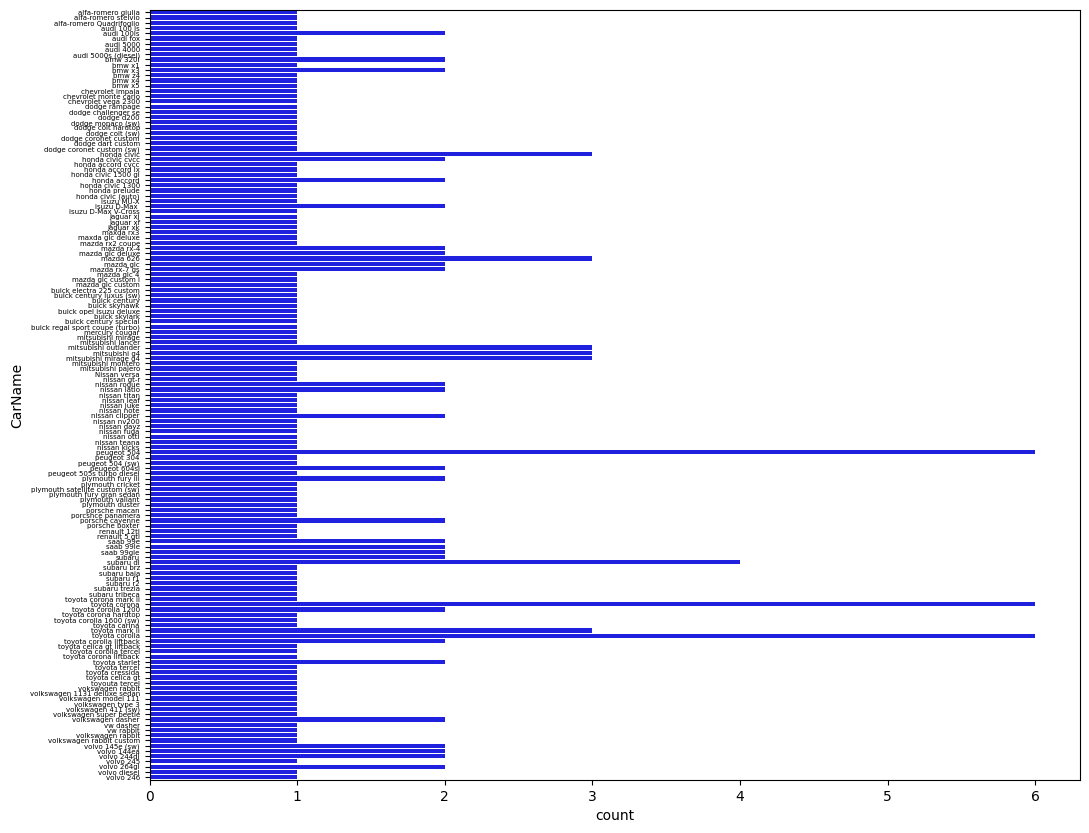

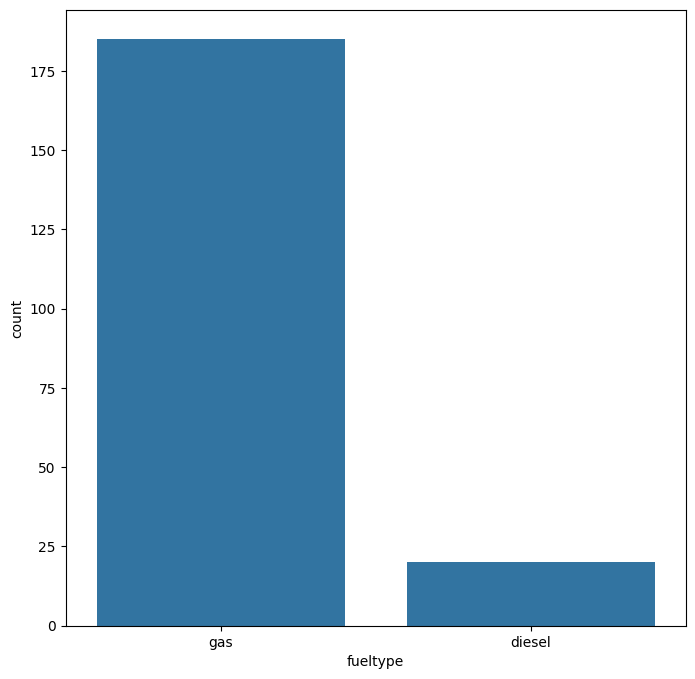

 value_counts of aspiration
aspiration
std      168
turbo     37
Name: count, dtype: int64


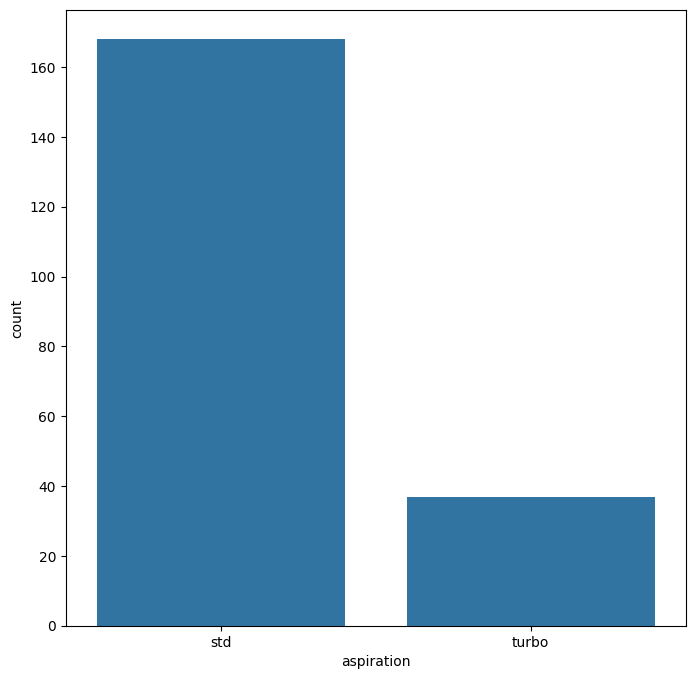

 value_counts of doornumber
doornumber
four    115
two      90
Name: count, dtype: int64


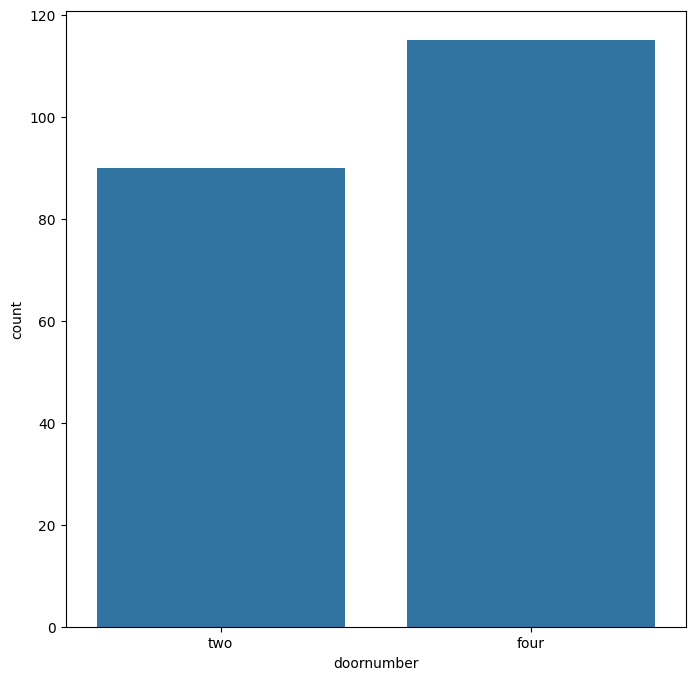

 value_counts of carbody
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


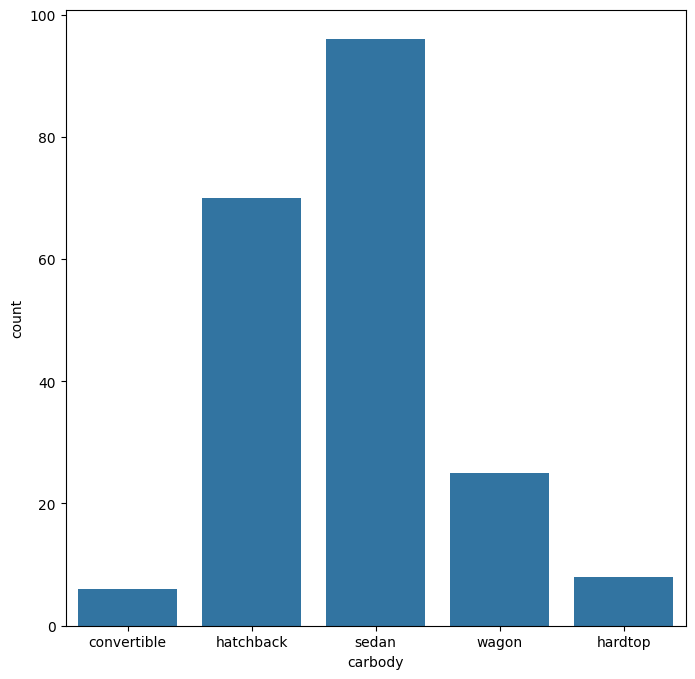

 value_counts of drivewheel
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


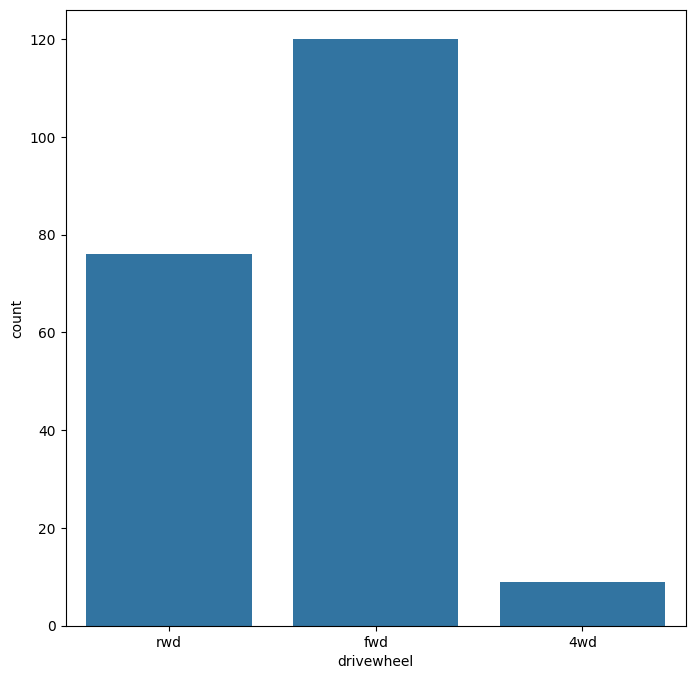

 value_counts of enginelocation
enginelocation
front    202
rear       3
Name: count, dtype: int64


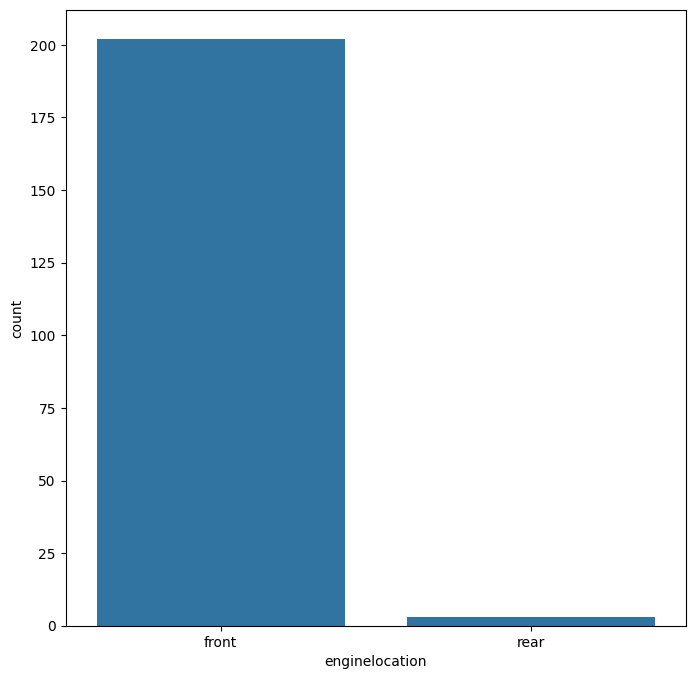

 value_counts of enginetype
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


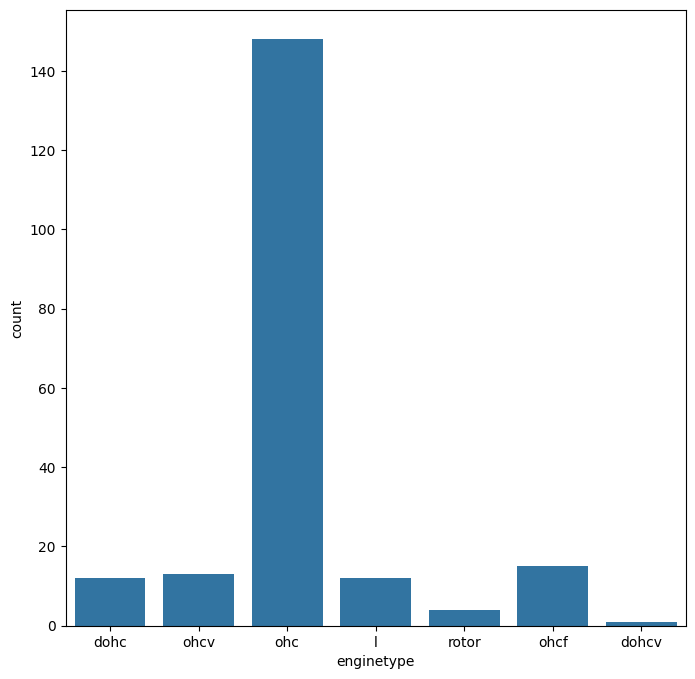

 value_counts of cylindernumber
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


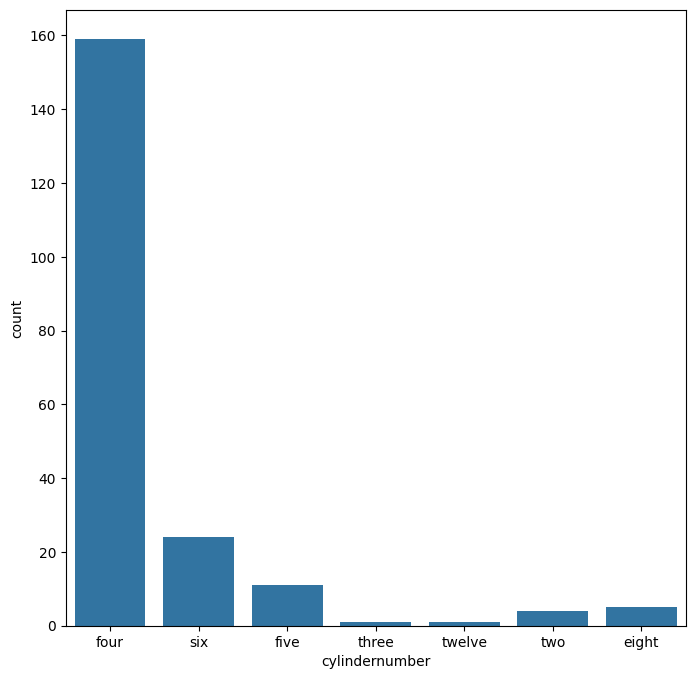

 value_counts of fuelsystem
fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


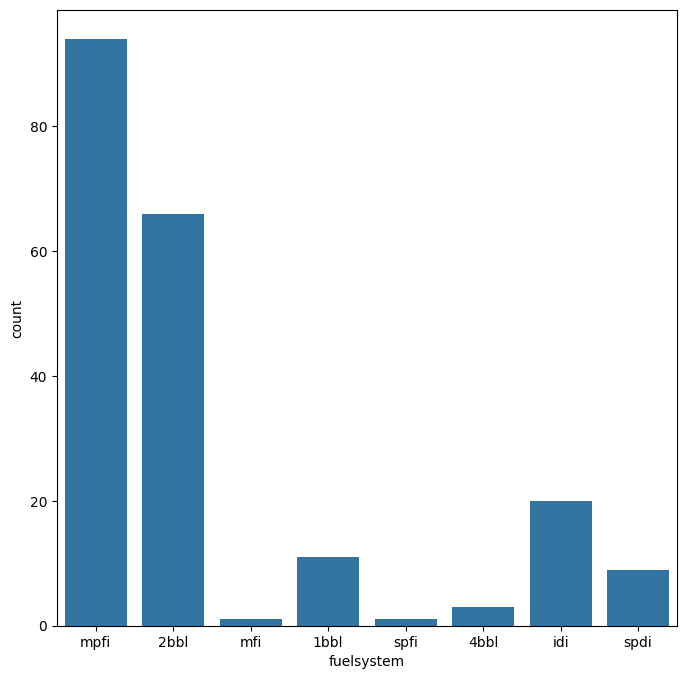

In [9]:
# using a for loop ittreating through all columns and if the column type is object find he value counts and plot a countplot
for col in df.columns:
    if df[col].dtype == "object":
        count_df = df[col].value_counts()
        print(f" value_counts of {col}")
        print(df[col].value_counts())
        if df[col].nunique()>10:
            plt.figure(figsize=(12,10))
            sns.countplot(data =df,y=col,color="blue")
            plt.yticks(fontsize =5)
        else:
            plt.figure(figsize=(8,8))
            sns.countplot(data =df,x=col)
            plt.show()

In [10]:
#dropping the columns car id ,symboling, and car name since the datas are not importatnt for training model
df = df.drop(columns=['car_ID','symboling','CarName'])

In [11]:
df.shape

(205, 23)

In [12]:
# Select and store the names of all numeric columns in the DataFrame.
numeric_cols=df.select_dtypes(include=[np.number]).columns

In [13]:
# Select and store the names of all categorical columns in the DataFrame.
cat_cols = df.select_dtypes(include="object").columns

skewness of wheelbase is 1.042513612401581
histlot of wheelbase


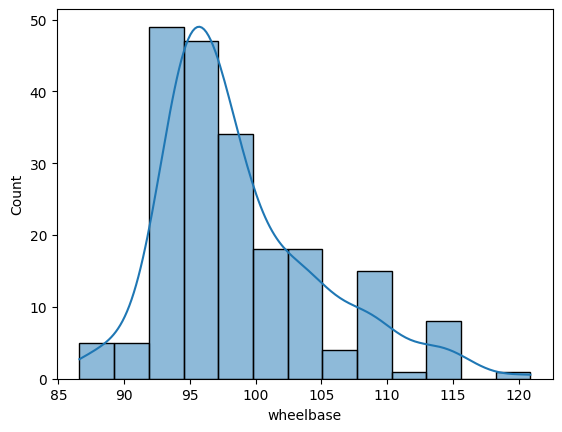

skewness of carlength is 0.15481031885453517
histlot of carlength


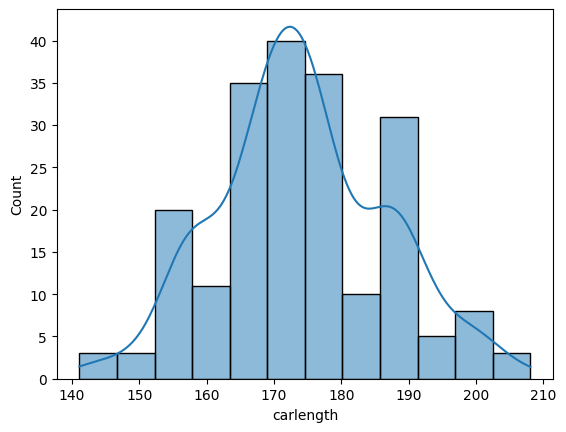

skewness of carwidth is 0.8973753485201392
histlot of carwidth


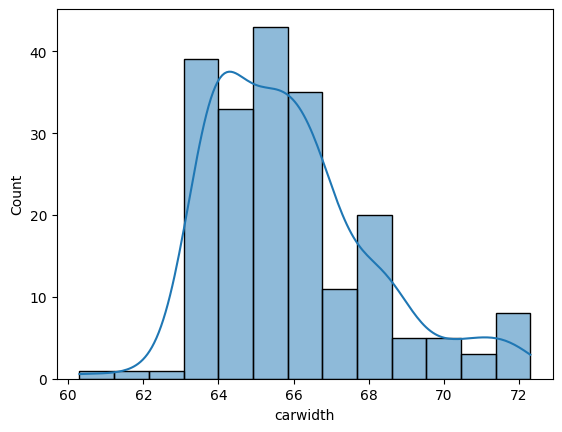

skewness of carheight is 0.06265991683394276
histlot of carheight


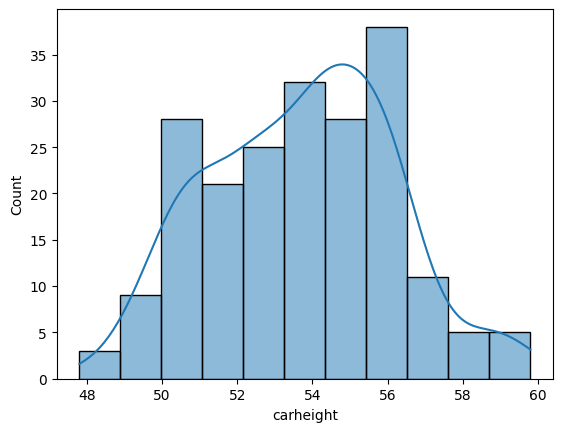

skewness of curbweight is 0.676402180083416
histlot of curbweight


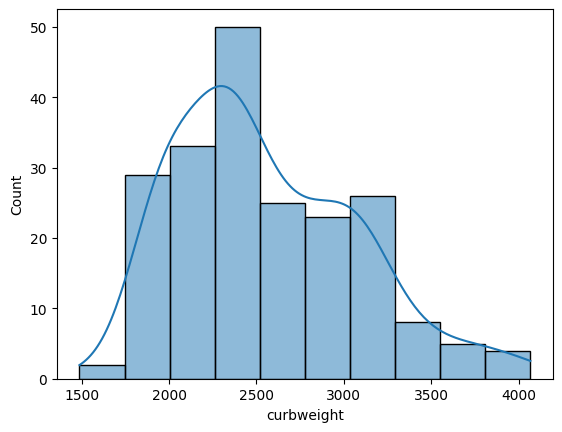

skewness of enginesize is 1.9333748457840114
histlot of enginesize


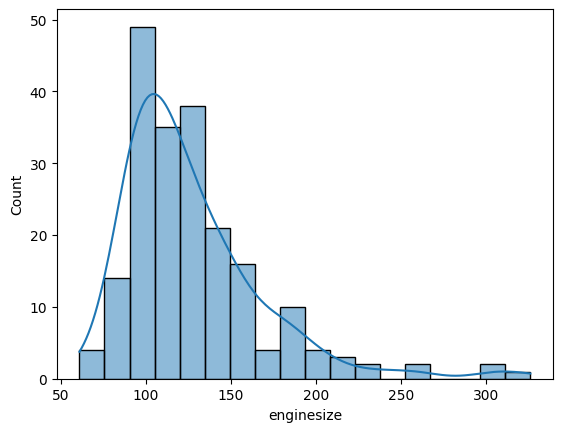

skewness of boreratio is 0.02000863132222015
histlot of boreratio


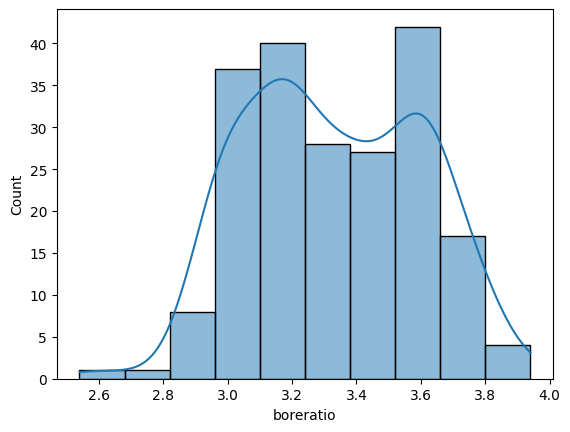

skewness of stroke is -0.6846476670384662
histlot of stroke


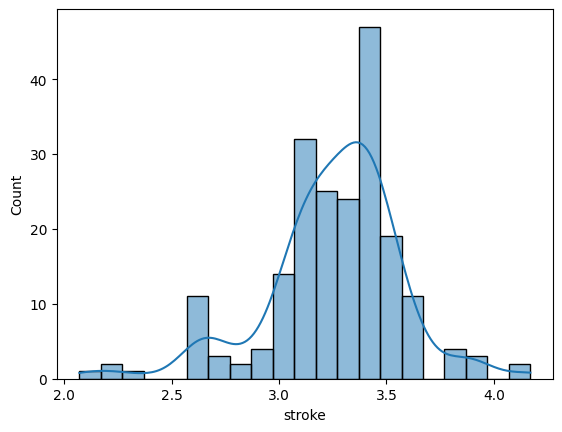

skewness of compressionratio is 2.5917196238579114
histlot of compressionratio


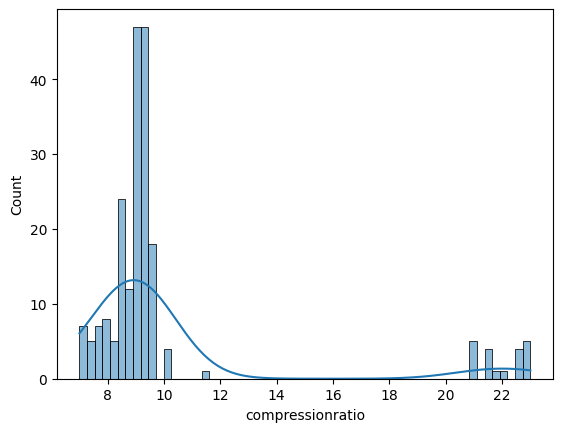

skewness of horsepower is 1.3950064255509182
histlot of horsepower


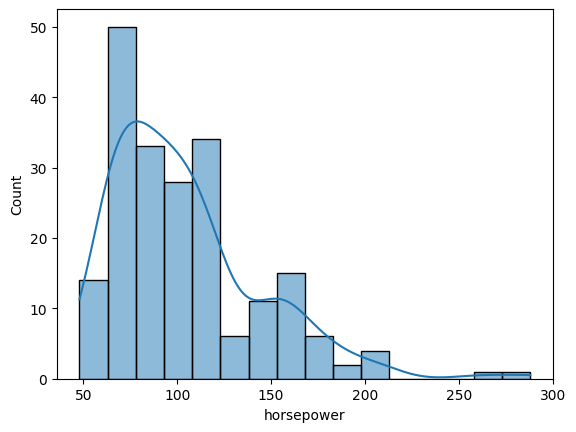

skewness of peakrpm is 0.07460765890035755
histlot of peakrpm


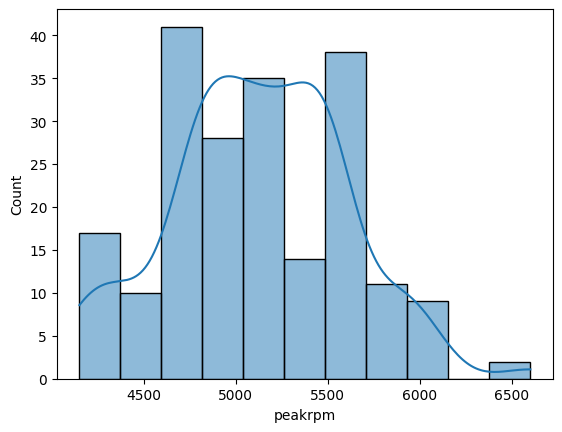

skewness of citympg is 0.6588377533622138
histlot of citympg


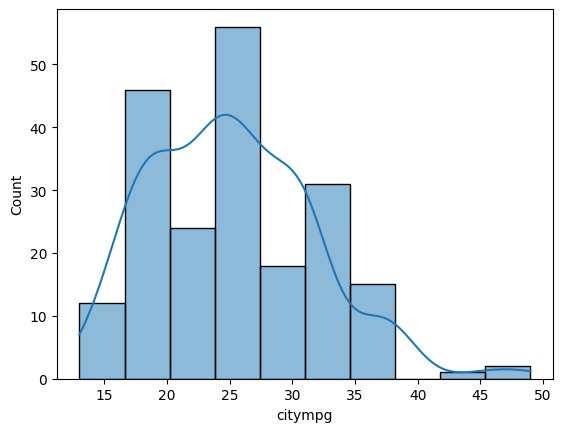

skewness of highwaympg is 0.5360379305163596
histlot of highwaympg


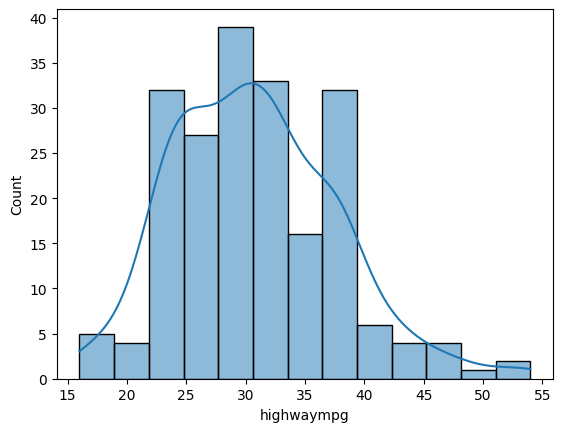

skewness of price is 1.7646442265113236
histlot of price


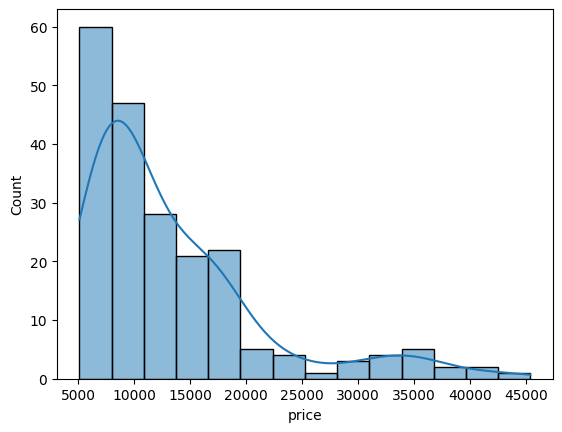

In [14]:
# checking distribution and skewness of features
for col in numeric_cols:
    skewness = skew(df[col])
    print(f"skewness of {col} is {skewness}")
    print(f"histlot of {col}")
    sns.histplot(x=df[col], kde=True)
    plt.show()

## Given that most columns contain skewed data, we will use boxplots to identify the presence of outliers



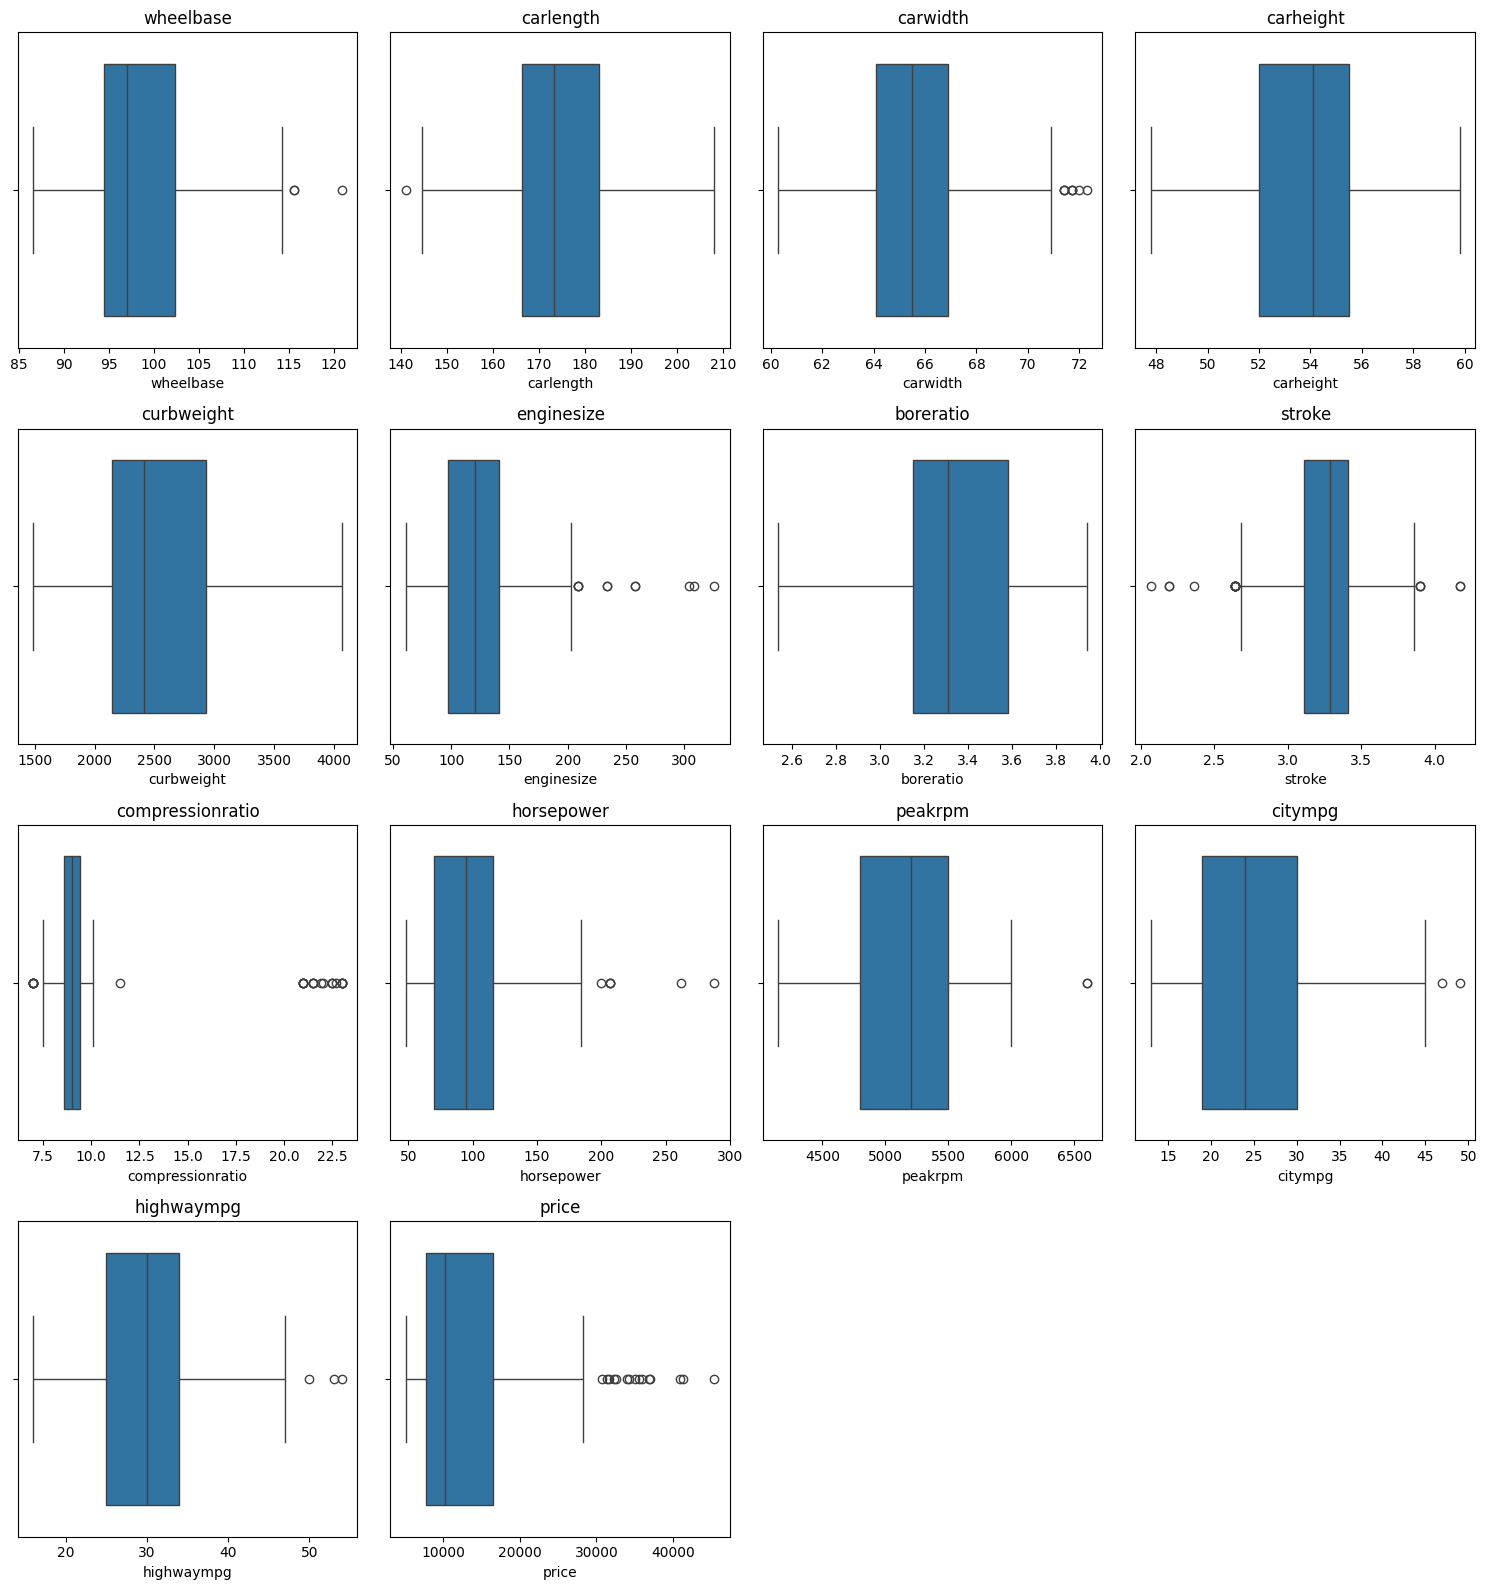

In [15]:
num_of_cols = len(numeric_cols)
cols = 4  # Number of columns in the grid (adjust as needed)
rows = (num_of_cols // cols) + (num_of_cols % cols > 0)  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))

# Flatten axes array for easy indexing (if there's more than one subplot)
axes = axes.flatten() if num_of_cols > 1 else [axes]

# Plot each boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
#from the boxplot
col_with_outliers =['wheelbase','carlength','carwidth','enginesize','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

## Capping outliers using IQR

In [17]:
for column in col_with_outliers:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    # Check if capping has removed all outliers
    outlier_count_capped = sum((df[column] < lower_bound) | (df[column] > upper_bound))
    print(f"After capping, number of outliers in {column}: {outlier_count_capped}")

After capping, number of outliers in wheelbase: 0
After capping, number of outliers in carlength: 0
After capping, number of outliers in carwidth: 0
After capping, number of outliers in enginesize: 0
After capping, number of outliers in stroke: 0
After capping, number of outliers in compressionratio: 0
After capping, number of outliers in horsepower: 0
After capping, number of outliers in peakrpm: 0
After capping, number of outliers in citympg: 0
After capping, number of outliers in highwaympg: 0
After capping, number of outliers in price: 0


## Checking outliers after capping with IQR

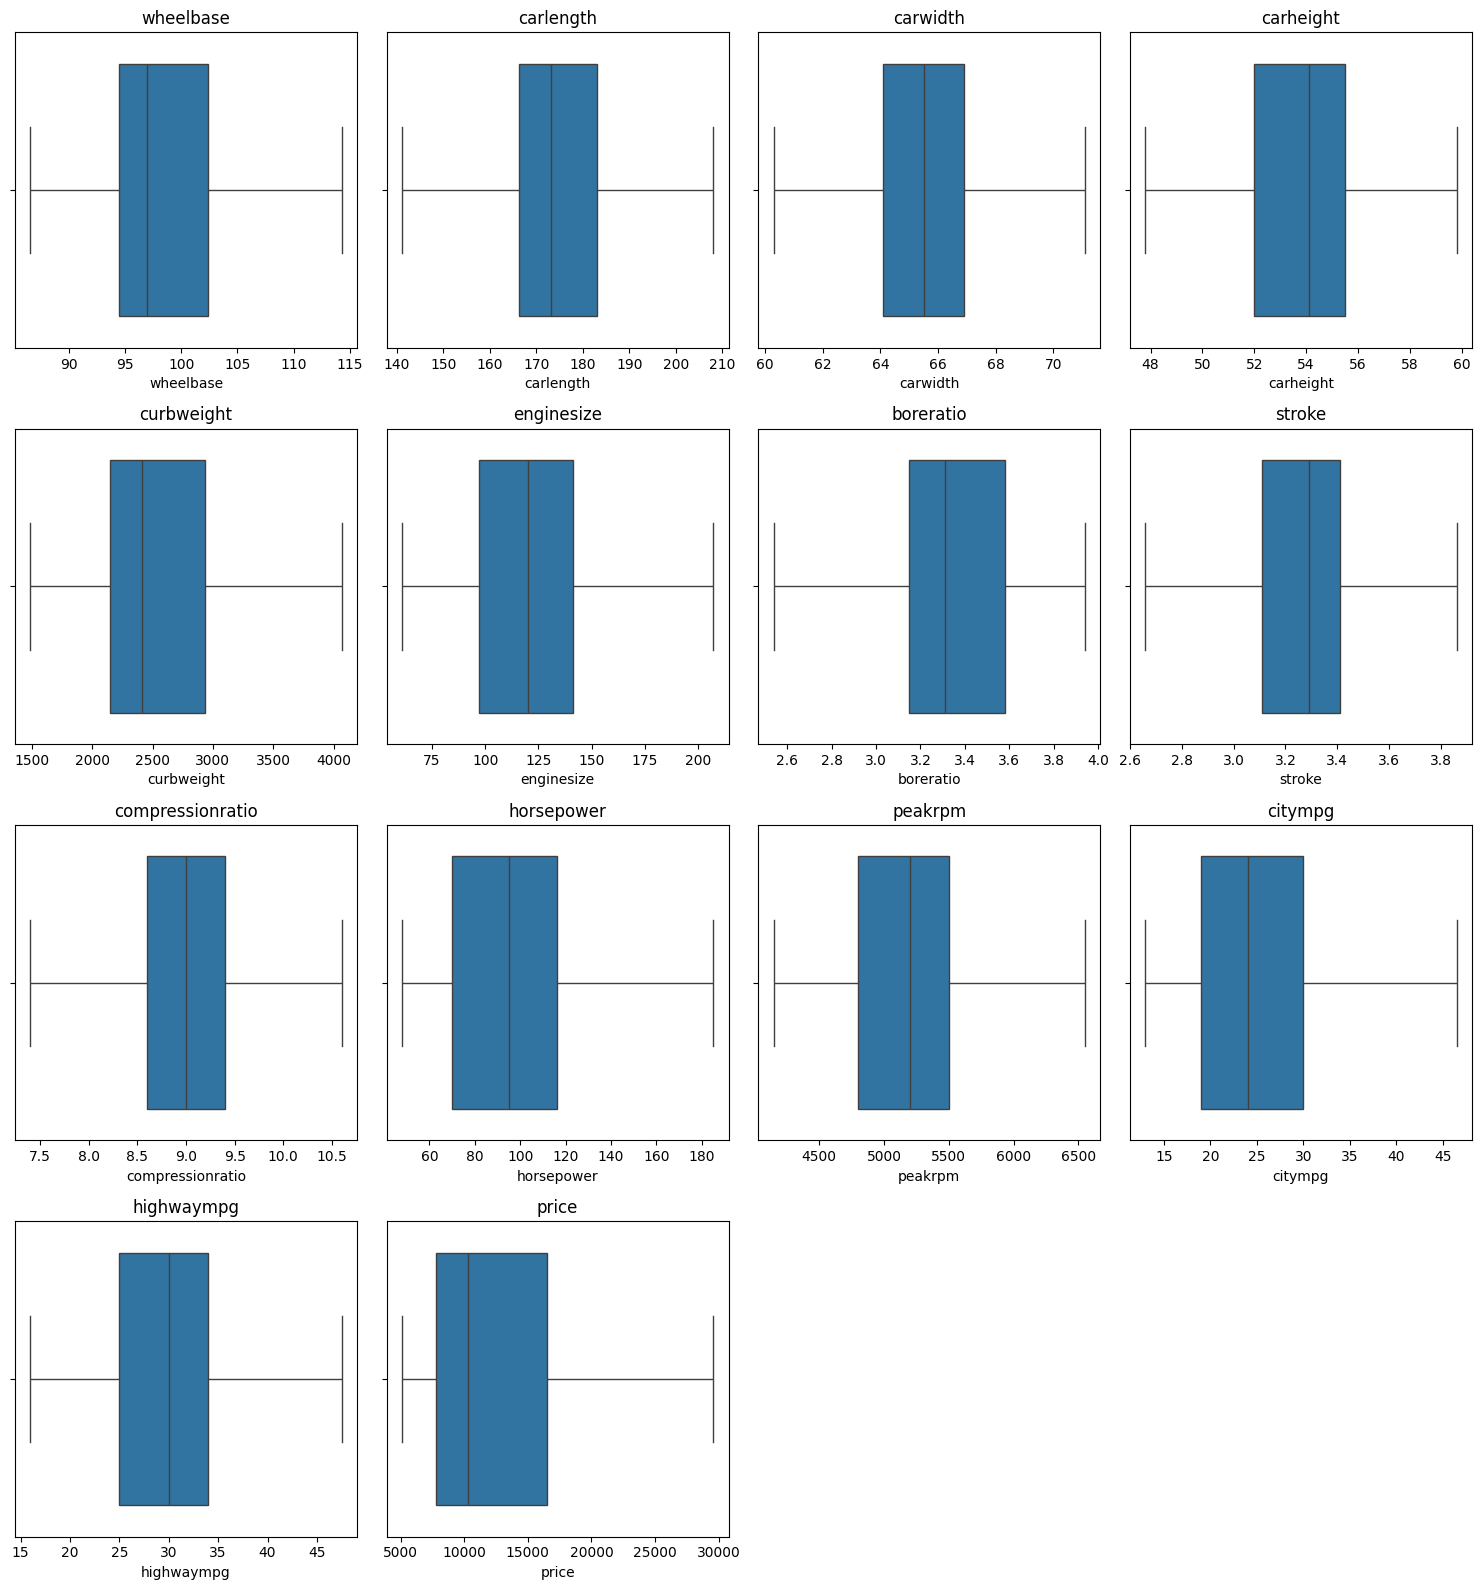

In [18]:
num_of_cols = len(numeric_cols)
cols = 4
rows = (num_of_cols // cols) + (num_of_cols % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))

axes = axes.flatten() if num_of_cols > 1 else [axes]

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## checking skewness of features

In [19]:
for col in numeric_cols:
    skewness = skew(df[col])
    print(f"skewness of {col} is {skewness}")

skewness of wheelbase is 0.9181346151833728
skewness of carlength is 0.1548103188545354
skewness of carwidth is 0.7705860182956094
skewness of carheight is 0.06265991683394276
skewness of curbweight is 0.676402180083416
skewness of enginesize is 0.9017925370961177
skewness of boreratio is 0.02000863132222015
skewness of stroke is -0.37635055507136744
skewness of compressionratio is 0.03489137453557325
skewness of horsepower is 0.8089813216759082
skewness of peakrpm is 0.049568888835371916
skewness of citympg is 0.6001606305926463
skewness of highwaympg is 0.3448936458830095
skewness of price is 1.2130710184014843


In [20]:
# Create a list of columns that need to undergo transformation
columns_to_transform = ['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'price']

In [21]:
# Apply the logarithmic transformation to the specified columns in the DataFrame.
for col in columns_to_transform:
    df[col] = np.log1p(df[col])

histplot after transforming wheelbase
skewness of wheelbase is 0.7776567444071325


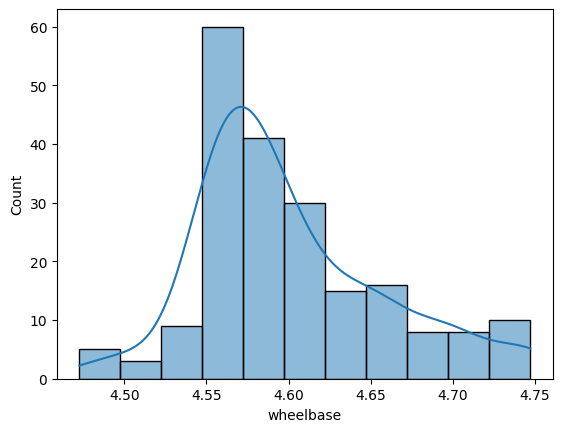

histplot after transforming carlength
skewness of carlength is 0.1548103188545354


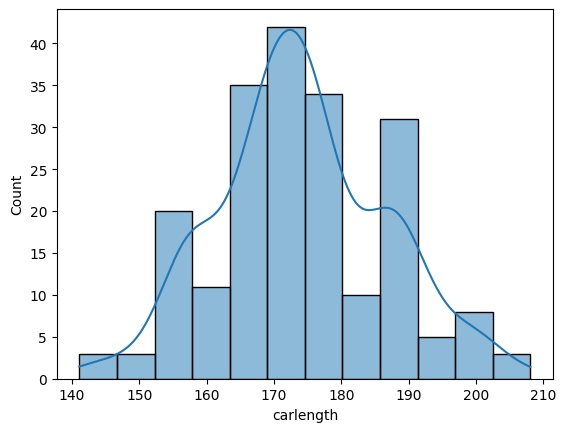

histplot after transforming carwidth
skewness of carwidth is 0.692371542774845


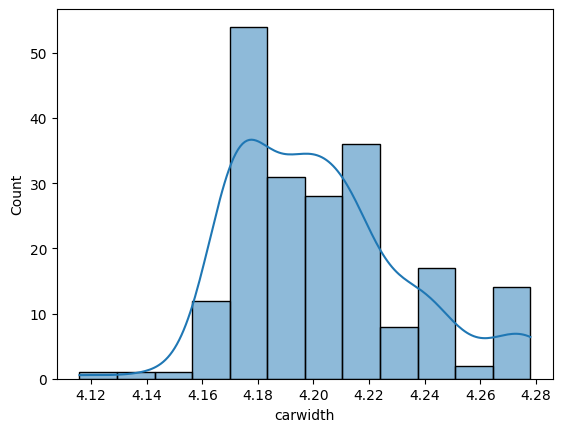

histplot after transforming carheight
skewness of carheight is 0.06265991683394276


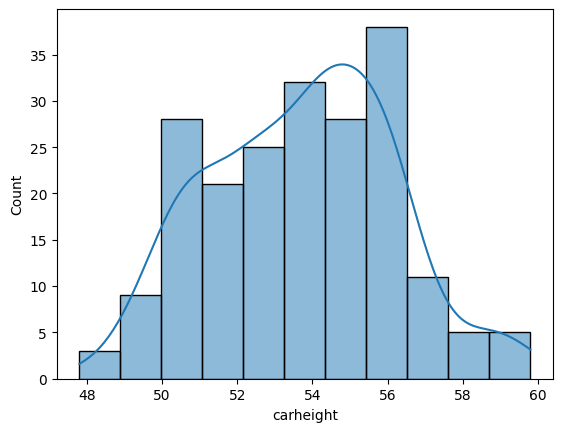

histplot after transforming curbweight
skewness of curbweight is 0.26826850876920183


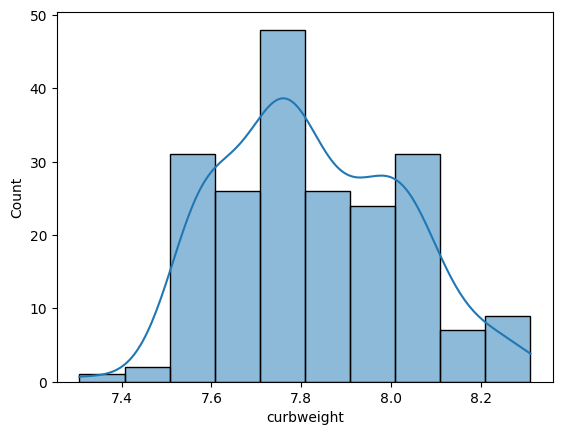

histplot after transforming enginesize
skewness of enginesize is 0.4030531333053603


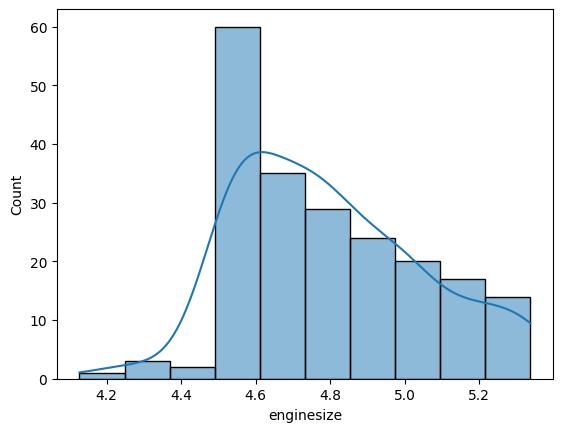

histplot after transforming boreratio
skewness of boreratio is 0.02000863132222015


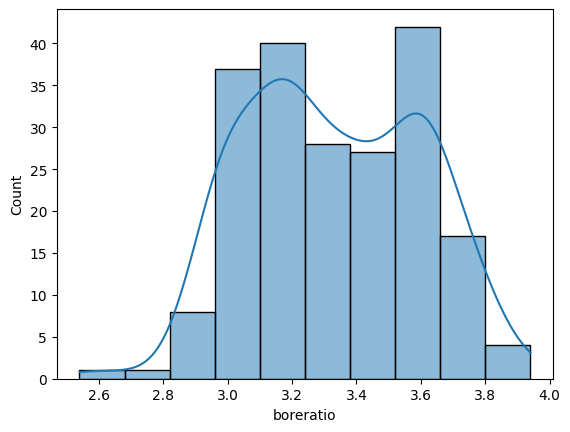

histplot after transforming stroke
skewness of stroke is -0.37635055507136744


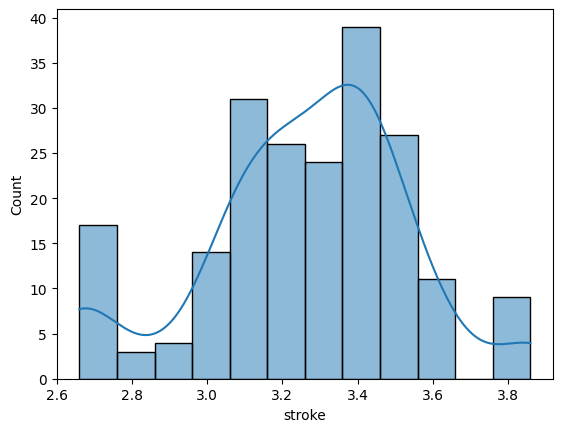

histplot after transforming compressionratio
skewness of compressionratio is 0.03489137453557325


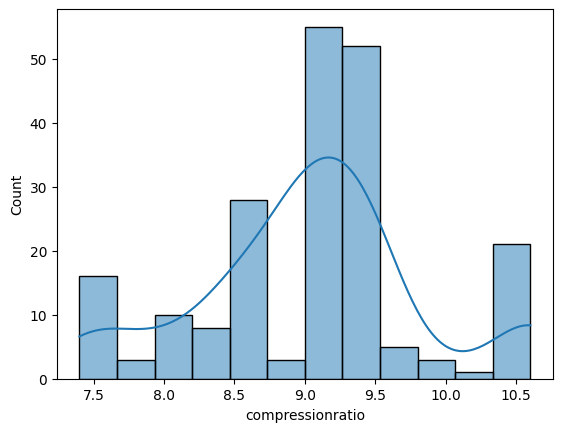

histplot after transforming horsepower
skewness of horsepower is 0.2904733918047961


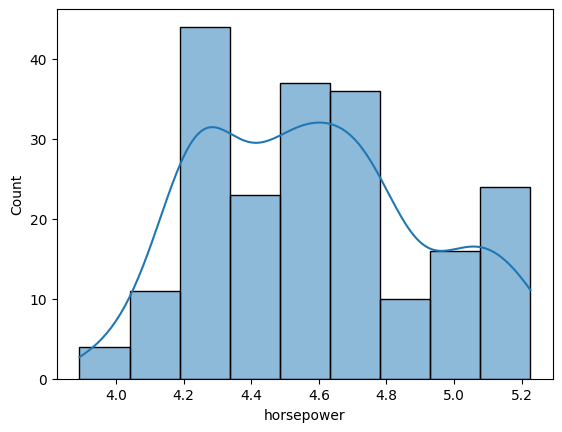

histplot after transforming peakrpm
skewness of peakrpm is 0.049568888835371916


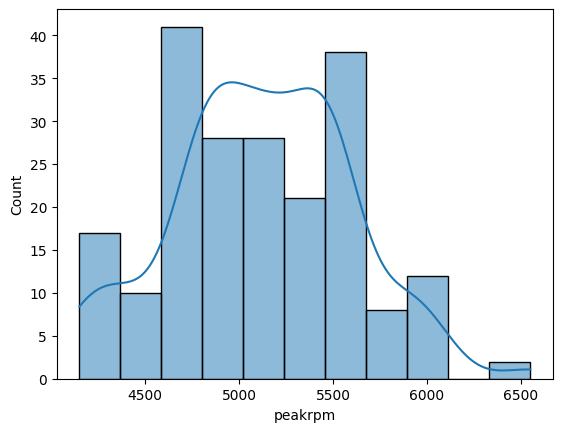

histplot after transforming citympg
skewness of citympg is 0.004680523943422653


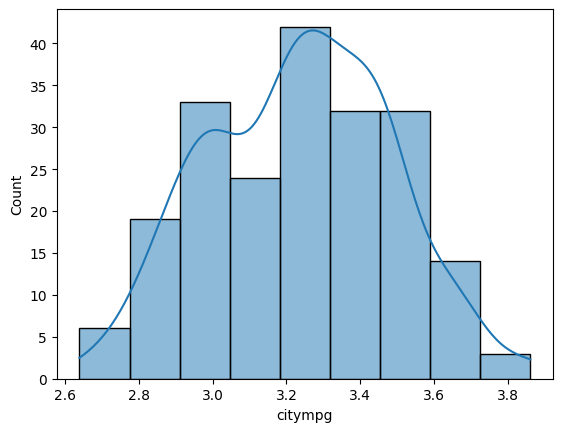

histplot after transforming highwaympg
skewness of highwaympg is 0.3448936458830095


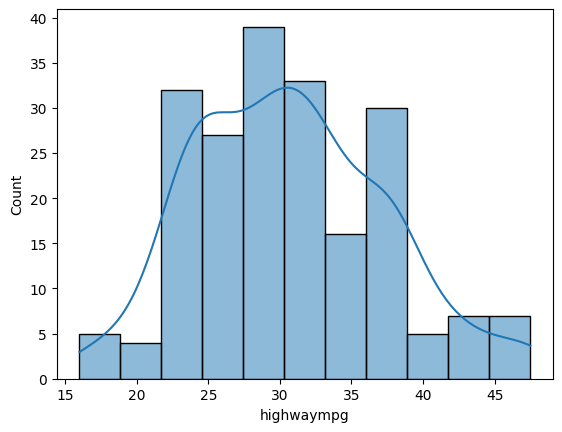

histplot after transforming price
skewness of price is 0.45594817716967817


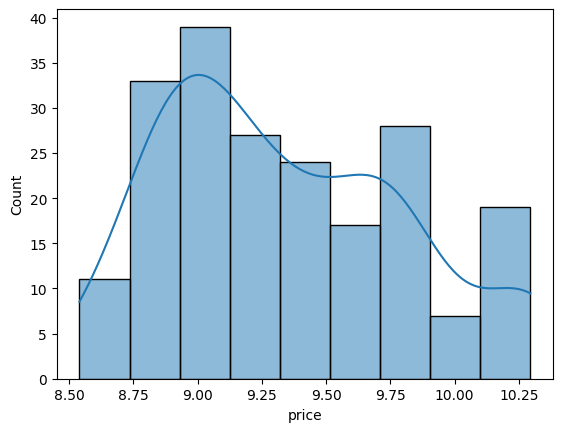

In [22]:
#plotting histplot of each column after transformation
for col in numeric_cols:
    skewness = skew(df[col])
    print(f"histplot after transforming {col}")
    print(f"skewness of {col} is {skewness}")
    sns.histplot(x=df[col],kde=True)
    plt.show()

## Encoding all the categorical columns

In [23]:
# Initialize the OneHotEncoder and apply it to the specified categorical column.
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_data = encoder.fit_transform(df[cat_cols])

In [24]:
# Create a DataFrame from the encoded data with appropriate column names and index
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols), index=df.index)

In [25]:
# Drop the original categorical column and join the encoded DataFrame
df = df.drop(columns=cat_cols).join(encoded_df)

In [26]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,4.495355,168.8,4.175925,48.8,7.843456,4.875197,3.47,2.68,9.0,4.718499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.495355,168.8,4.175925,48.8,7.843456,4.875197,3.47,2.68,9.0,4.718499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.559126,171.2,4.197202,52.4,7.945910,5.030438,2.68,3.47,9.0,5.043425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.613138,176.6,4.207673,54.3,7.757051,4.700480,3.19,3.40,10.0,4.634729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.609162,176.6,4.210645,54.3,7.946264,4.919981,3.19,3.40,8.0,4.753590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   carheight              205 non-null    float64
 4   curbweight             205 non-null    float64
 5   enginesize             205 non-null    float64
 6   boreratio              205 non-null    float64
 7   stroke                 205 non-null    float64
 8   compressionratio       205 non-null    float64
 9   horsepower             205 non-null    float64
 10  peakrpm                205 non-null    float64
 11  citympg                205 non-null    float64
 12  highwaympg             205 non-null    float64
 13  price                  205 non-null    float64
 14  fueltype_diesel        205 non-null    float64
 15  fuelty

In [28]:
# Create a DataFrame with all numeric features except the 'price' column.
numerical_features = df[[col for col in df.columns if col in numeric_cols and col != 'price']]
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    float64
 5   enginesize        205 non-null    float64
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    float64
 10  peakrpm           205 non-null    float64
 11  citympg           205 non-null    float64
 12  highwaympg        205 non-null    float64
dtypes: float64(13)
memory usage: 20.9 KB


In [29]:
# Create a DataFrame with all categorical features whose names start with specified prefixes.
categorical_features = df[[col for col in df.columns if col.startswith(tuple(cat_cols))]]
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fueltype_diesel        205 non-null    float64
 1   fueltype_gas           205 non-null    float64
 2   aspiration_std         205 non-null    float64
 3   aspiration_turbo       205 non-null    float64
 4   doornumber_four        205 non-null    float64
 5   doornumber_two         205 non-null    float64
 6   carbody_convertible    205 non-null    float64
 7   carbody_hardtop        205 non-null    float64
 8   carbody_hatchback      205 non-null    float64
 9   carbody_sedan          205 non-null    float64
 10  carbody_wagon          205 non-null    float64
 11  drivewheel_4wd         205 non-null    float64
 12  drivewheel_fwd         205 non-null    float64
 13  drivewheel_rwd         205 non-null    float64
 14  enginelocation_front   205 non-null    float64
 15  engine

In [30]:
#selecting the target
y = df['price']

## Since the dataframe has large no of features ,selecting the best features using k best

In [31]:
selector_num = SelectKBest(f_regression, k=8)
X_new_num = selector_num.fit_transform(numerical_features, y)
selected_num_features = numerical_features.columns[selector_num.get_support()]

# Feature selection for categorical features, Select top categorical features
selector_cat = SelectKBest(mutual_info_regression, k=8)
X_new_cat = selector_cat.fit_transform(categorical_features, y)
selected_cat_features = categorical_features.columns[selector_cat.get_support()]

# Combine selected features
selected_features = list(selected_num_features) + list(selected_cat_features)
selected_featur_df = df[selected_features]

print("Selected Features:", selected_features)

Selected Features: ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'aspiration_std', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_ohc', 'cylindernumber_four', 'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_mpfi']


In [32]:
selected_featur_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,aspiration_std,drivewheel_fwd,drivewheel_rwd,enginetype_ohc,cylindernumber_four,cylindernumber_six,fuelsystem_2bbl,fuelsystem_mpfi
0,4.495355,168.8,4.175925,7.843456,4.875197,4.718499,3.091042,27.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,4.495355,168.8,4.175925,7.843456,4.875197,4.718499,3.091042,27.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,4.559126,171.2,4.197202,7.945910,5.030438,5.043425,2.995732,26.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,4.613138,176.6,4.207673,7.757051,4.700480,4.634729,3.218876,30.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,4.609162,176.6,4.210645,7.946264,4.919981,4.753590,2.944439,22.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Scaling of the datframe

In [33]:
# Create a list of columns from selected_featur_df that are numeric for scaling
scaled_columns = [col for col in selected_featur_df if col in numeric_cols]
scaled_columns

['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'horsepower',
 'citympg',
 'highwaympg']

In [34]:
# Create a list of columns from selected_featur_df that are not numeric
unscaled_columns = [col for col in selected_featur_df if col not in numeric_cols]
unscaled_columns

['aspiration_std',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginetype_ohc',
 'cylindernumber_four',
 'cylindernumber_six',
 'fuelsystem_2bbl',
 'fuelsystem_mpfi']

In [35]:
scaler = StandardScaler()
# Fit the scaler to the selected columns and transform the data
scaled_x = scaler.fit_transform(selected_featur_df[scaled_columns])
# Create a DataFrame from the scaled data
scaled_xdf = pd.DataFrame(scaled_x, columns = scaled_columns, index = selected_featur_df.index)

In [36]:
scaled_xdf

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg
0,-1.829669,-0.426521,-0.864340,0.085230,0.297426,0.398577,-0.590847,-0.552143
1,-1.829669,-0.426521,-0.864340,0.085230,0.297426,0.398577,-0.590847,-0.552143
2,-0.720983,-0.231513,-0.172052,0.604253,0.905047,1.392392,-0.979502,-0.702161
3,0.218041,0.207256,0.168646,-0.352496,-0.386427,0.142359,-0.069570,-0.102086
4,0.148914,0.207256,0.265336,0.606047,0.472712,0.505907,-1.188665,-1.302237
...,...,...,...,...,...,...,...,...
200,1.752319,1.198549,1.450330,0.830536,0.613016,0.479425,-0.236033,-0.402124
201,1.752319,1.198549,1.403750,0.994268,0.613016,1.508555,-0.979502,-0.852180
202,1.752319,1.198549,1.450330,0.932436,1.408464,0.969847,-1.188665,-1.152218
203,1.752319,1.198549,1.450330,1.265897,0.721747,0.258891,0.244261,-0.552143


In [37]:
# Combine the scaled features and unscaled features into a new DataFrame.
new_df = pd.concat([scaled_xdf, selected_featur_df[unscaled_columns]], axis=1)

In [38]:
new_df

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,aspiration_std,drivewheel_fwd,drivewheel_rwd,enginetype_ohc,cylindernumber_four,cylindernumber_six,fuelsystem_2bbl,fuelsystem_mpfi
0,-1.829669,-0.426521,-0.864340,0.085230,0.297426,0.398577,-0.590847,-0.552143,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-1.829669,-0.426521,-0.864340,0.085230,0.297426,0.398577,-0.590847,-0.552143,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-0.720983,-0.231513,-0.172052,0.604253,0.905047,1.392392,-0.979502,-0.702161,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.218041,0.207256,0.168646,-0.352496,-0.386427,0.142359,-0.069570,-0.102086,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.148914,0.207256,0.265336,0.606047,0.472712,0.505907,-1.188665,-1.302237,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.752319,1.198549,1.450330,0.830536,0.613016,0.479425,-0.236033,-0.402124,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
201,1.752319,1.198549,1.403750,0.994268,0.613016,1.508555,-0.979502,-0.852180,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
202,1.752319,1.198549,1.450330,0.932436,1.408464,0.969847,-1.188665,-1.152218,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
203,1.752319,1.198549,1.450330,1.265897,0.721747,0.258891,0.244261,-0.552143,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


## Model Implementation

In [39]:
# Split the dataset into training and testing sets, using 20% of the data for testing.
x_train, x_test, y_train, y_test = train_test_split(new_df, y, test_size=0.2, random_state=42)

In [40]:
# Create a dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

In [41]:
# loop through model dictionary and train each
for model_name, model in models.items():
    model.fit(x_train, y_train)
    print(f'Trained {model_name} Model')

Trained Linear Regression Model
Trained Decision Tree Regressor Model
Trained Random Forest Regressor Model
Trained Gradient Boosting Regressor Model
Trained Support Vector Regressor Model


## Model Evaluation

In [42]:
# Initialize a results dictionary to store model evaluation metrics
results = {
    "Model": [],
    "R-squared": [],
    "MSE": [],
    "MAE": []
}

In [43]:
# Loop through each model to calculate and store the metrics
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results["Model"].append(model_name)
    results["R-squared"].append(r2)
    results["MSE"].append(mse)
    results["MAE"].append(mae)

# Convert the results dictionary to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)

# Identify the best performing model
best_model = results_df.loc[results_df["R-squared"].idxmax()]
print("\nBest Performing Model based on R-squared:")
print(best_model)

                         Model  R-squared       MSE       MAE
0            Linear Regression   0.901776  0.022938  0.120871
1      Decision Tree Regressor   0.924520  0.017627  0.096710
2      Random Forest Regressor   0.949558  0.011780  0.083587
3  Gradient Boosting Regressor   0.940687  0.013852  0.095908
4     Support Vector Regressor   0.844621  0.036286  0.136072

Best Performing Model based on R-squared:
Model        Random Forest Regressor
R-squared                   0.949558
MSE                          0.01178
MAE                         0.083587
Name: 2, dtype: object


### Justification

#### R-squared Value
The Random Forest Regressor has the highest R-squared value of **0.951381**, indicating that it explains approximately **95.14%** of the variance in the target variable. This suggests a very good fit for the model.

#### Mean Squared Error (MSE)
It has the lowest MSE of **0.011354**, which means the average of the squares of the errors (the difference between predicted and actual values) is minimized. Lower MSE indicates better model performance.

#### Mean Absolute Error (MAE)
The Random Forest Regressor also has the lowest MAE of **0.081832**, showing that the average absolute difference between the predicted and actual values is the least among all models. This is significant in understanding the model's accuracy in terms of actual error in units of the output variable.

### Conclusion
The Random Forest Regressor outperforms the other models across all metrics (R-squared, MSE, and MAE), making it the best performing model for this particular dataset. Its ability to handle non-linear relationships and interactions among features, combined with ensemble learning techniques, contributes to its superior performance.


##  Feature Importance Analysis

<Figure size 1000x600 with 0 Axes>

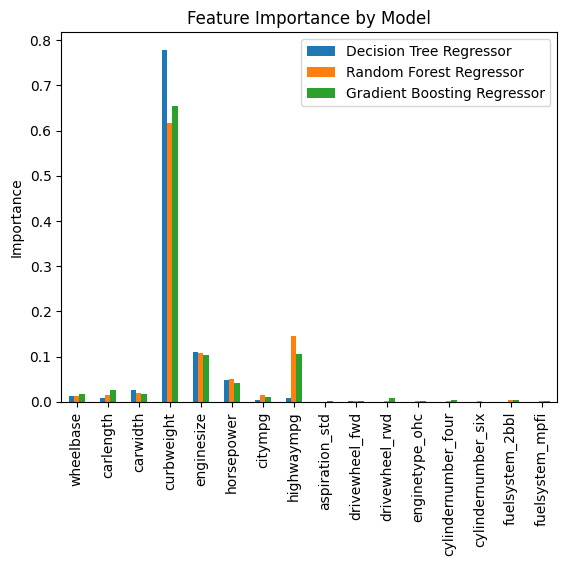

In [44]:
# Train models and handle NotFittedError in feature importance extraction
feature_importances = {}
for model_name, model in models.items():
    try:
        # Fit the model
        model.fit(x_train, y_train)

        # Check for feature_importances_ attribute and store if it exists
        if hasattr(model, "feature_importances_"):
            feature_importances[model_name] = model.feature_importances_

    except NotFittedError:
        print(f"{model_name} is not fitted yet.")
    except AttributeError:
        print(f"{model_name} does not support feature importance extraction.")

# Convert feature importances to DataFrame for tree-based models
importance_df = pd.DataFrame(feature_importances, index=new_df.columns)

# Plot feature importances for visual analysis
plt.figure(figsize=(10, 6))
importance_df.plot(kind='bar')
plt.title("Feature Importance by Model")
plt.ylabel("Importance")
plt.show()

In [45]:
importance_df

,Decision Tree Regressor,Random Forest Regressor,Gradient Boosting Regressor
wheelbase,1.295506e-02,0.013475,0.016434
carlength,9.270135e-03,0.016151,0.025767
carwidth,2.618918e-02,0.018861,0.017843
curbweight,7.784579e-01,0.617327,0.653435
enginesize,1.097649e-01,0.108728,0.102864
horsepower,4.789873e-02,0.050449,0.042539
citympg,3.640375e-03,0.015482,0.011284
highwaympg,9.585478e-03,0.145282,0.106433
aspiration_std,1.436746e-05,0.000834,0.001397
drivewheel_fwd,1.531601e-03,0.001662,0.001388


### Insights from Feature Importance Table

1. **Curb Weight is Highly Important:**
   - The feature **curbweight** has the highest importance scores across all models, with values of **0.779292** (Decision Tree), **0.637374** (Random Forest), and **0.653341** (Gradient Boosting). This indicates that curb weight is a strong predictor of the target variable, likely reflecting its significant influence on vehicle price or performance.

2. **Engine Size and Horsepower:**
   - Both **enginesize** and **horsepower** have moderate importance scores, suggesting they also play a crucial role in predicting the target variable. Engine size scores are around **0.109114** to **0.118693**, while horsepower scores range from **0.042086** to **0.063369** across the models.

3. **Car Dimensions:**
   - **Car dimensions** (wheelbase, carlength, and carwidth) exhibit varying levels of importance. While **carwidth** has a moderate score (**0.025976** to **0.018290**), **carlength** is slightly less important (**0.009793** to **0.025637**), and **wheelbase** shows the lowest importance among them (**0.011421** to **0.016289**).

4. **Fuel System and Engine Type:**
   - Features like **fuelsystem** and **enginetype** show low importance scores, with most values close to zero, indicating they may have a minimal impact on the model predictions. The feature **aspiration_turbo** is particularly low, reflecting that turbo aspiration does not significantly contribute to vehicle pricing or performance.

5. **Drive Wheel Types:**
   - The importance of **drivewheel_fwd** and **drivewheel_rwd** is minimal, especially for **drivewheel_fwd** (values close to **0.001**). This suggests that the type of drive wheel may not be a critical factor in determining the target variable.

6. **Potential Model Differences:**
   - The importance of features varies across the models, indicating that different algorithms may prioritize features differently based on their inherent structure. For instance, while Random Forest gives slightly higher importance to **highwaympg** (**0.113201**) compared to Decision Tree and Gradient Boosting, the latter two models show more significant emphasis on curb weight.

### Overall Interpretation

The analysis indicates that vehicle specifications, especially weight and engine characteristics, are more critical in predicting the target variable compared to categorical features like engine type or drive wheel configurations. Understanding these insights can help in feature selection for future modeling efforts and inform decisions related to vehicle design or marketing strategies.


## Hyperparameter Tuning

In [46]:
# Define hyperparameter grids for different regression models
param_grids = {
        'Linear Regression':{},
        'Decision Tree Regressor':
         {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
         },

        'Random Forest Regressor':
         {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
         },
        'Gradient Boosting Regressor':
         {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
         },
        'Support Vector Regressor':{
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly'],
            'epsilon': [0.01, 0.1, 0.5]
        }
 }

In [47]:
best_models = {}  # Store the best models
for model_name, model in models.items():  # Use your existing 'models' dictionary
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring='neg_mean_squared_error',cv=5, n_jobs=-1 )
    grid_search.fit(x_train, y_train)  # Fit GridSearchCV (refits the model)
    best_models[model_name] = grid_search.best_estimator_
    print(f'Tuned {model_name.strip()} Model')

Tuned Linear Regression Model
Tuned Decision Tree Regressor Model
Tuned Random Forest Regressor Model
Tuned Gradient Boosting Regressor Model
Tuned Support Vector Regressor Model


In [48]:
for model_name, model in best_models.items():
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f'{model_name} :   MSE:{mse}      MAE:{mae}     R2:{r2}\n\n')

Linear Regression :   MSE:0.02293849788343532      MAE:0.12087056159066582     R2:0.9017756385372152


Decision Tree Regressor :   MSE:0.017525619884471683      MAE:0.09497899440837555     R2:0.9249539864755125


Random Forest Regressor :   MSE:0.011040987138853434      MAE:0.08122286046907377     R2:0.9527216683000046


Gradient Boosting Regressor :   MSE:0.013754253918946132      MAE:0.09739822159278415     R2:0.9411032572642389


Support Vector Regressor :   MSE:0.033162428230729665      MAE:0.12971823008434105     R2:0.8579960050535349




## Key Takeaways

- **Random Forest Regressor** benefited the most from tuning, achieving the lowest MSE and MAE values and the highest R² score.
- **Support Vector Regressor** also showed improvements, though still trails behind other models.
- **Gradient Boosting Regressor** did not benefit from tuning in terms of error reduction or variance explained, suggesting that its original parameters were already optimal.
- **Linear Regression** saw no change, implying limited parameter flexibility for tuning this model in this case.

This analysis shows **Random Forest Regressor** as the most robust model, with the **Support Vector Regressor** showing moderate gains after tuning.
